<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/BootcampDataScienceAplicada3/Projetos/Modulo%201/Projeto_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 - BootCamp Data Science Aplicada 3

Neste notebook, analisaremos mtas coisas

Pensei em comparar a situação da saúde pública com a privada.
Eu posso trazer a base de dados de internações e de valor total de escopo privado e público.

Vou fazer por estado.

Vou usar ano/mes atendimento, e n usarei dados de 2021, pq acho q eles n são tão confiáveis, tão sendo processados ainda.

Eu vou usar as Naturezas Jurídicas de admnistração pública e as de entidades empresariais

Posso plotar um gráfico comparando o número de casos atendidos em cada um, dá até fazer um custo por caso.


Dependendo, eu posso tbm pegar a taxa de mortalidade de cada um deles e ver no q dá.

Pegando primeiro internações privadas


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#Arrumando como os valores são mostrados
pd.options.display.float_format = "{:.2f}".format

#Setando o estilo dos gráficos pra ggplot
plt.style.use('ggplot')

In [71]:
#importando Internações Privadas
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/Internacoes_Privadas.csv'
internacoes_privadas = pd.read_csv(URL, encoding='utf8', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",")

internacoes_privadas = internacoes_privadas.drop("Total", axis=1) #tirando a coluna total
internacoes_privadas = internacoes_privadas.set_index("Unidade da Federação") #setando o índice
internacoes_privadas = internacoes_privadas.replace('-', np.nan) #substituindo dado inexistente por nan
internacoes_privadas = internacoes_privadas.astype('float64') #mudando tudo para float64

internacoes_privadas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,2011/Jun,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,1.00,58.00,111.00,79.00,42.00,37.00,58.00,51.00,50.00,55.00,43.00,47.00,44.00,38.00,50.00,45.00,56.00,57.00,46.00,58.00,61.00,59.00,45.00,50.00,49.00,56.00,42.00,52.00,42.00,42.00,62.00,49.00,36.00,37.00,...,87.00,102.00,78.00,84.00,91.00,88.00,85.00,77.00,87.00,88.00,78.00,267.00,287.00,264.00,213.00,230.00,255.00,290.00,302.00,258.00,234.00,220.00,220.00,251.00,348.00,402.00,366.00,298.00,274.00,278.00,218.00,279.00,183.00,281.00,226.00,237.00,158.00,159.00,122.00,25.00
13 Amazonas,nan,nan,nan,nan,1.00,nan,nan,4.00,124.00,124.00,128.00,41.00,91.00,132.00,119.00,121.00,70.00,83.00,64.00,61.00,85.00,67.00,174.00,46.00,16.00,10.00,17.00,15.00,29.00,22.00,12.00,27.00,36.00,29.00,27.00,59.00,36.00,29.00,29.00,29.00,...,55.00,53.00,58.00,61.00,56.00,59.00,54.00,55.00,48.00,55.00,45.00,54.00,52.00,31.00,53.00,21.00,57.00,72.00,283.00,367.00,363.00,362.00,120.00,121.00,161.00,255.00,282.00,329.00,355.00,317.00,222.00,184.00,286.00,232.00,317.00,366.00,362.00,376.00,422.00,233.00
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,34.00,139.00,131.00,129.00,123.00,117.00,130.00,...,137.00,134.00,121.00,109.00,139.00,120.00,93.00,146.00,146.00,138.00,141.00,133.00,132.00,138.00,24.00,72.00,140.00,183.00,159.00,196.00,115.00,50.00,90.00,103.00,75.00,104.00,194.00,147.00,100.00,11.00,52.00,138.00,138.00,197.00,185.00,149.00,146.00,114.00,92.00,nan
15 Pará,nan,nan,nan,5.00,31.00,603.00,2252.00,7977.00,12617.00,12109.00,13378.00,13176.00,13233.00,13056.00,11674.00,13447.00,12127.00,13643.00,13706.00,12486.00,11959.00,11093.00,11865.00,12627.00,12669.00,12339.00,11712.00,12090.00,11463.00,12532.00,11622.00,11126.00,10032.00,10830.00,10196.00,10274.00,9754.00,9429.00,8601.00,8137.00,...,7167.00,7000.00,7194.00,6695.00,7667.00,6398.00,5959.00,6850.00,6222.00,7022.00,7083.00,7221.00,6354.00,6042.00,6120.00,5932.00,6221.00,6383.00,5766.00,6349.00,6158.00,6108.00,4333.00,4174.00,4576.00,4799.00,5055.00,4867.00,5453.00,5307.00,4928.00,4470.00,4066.00,4205.00,3966.00,4396.00,4294.00,4139.00,2759.00,1062.00
17 Tocantins,nan,nan,nan,nan,nan,1.00,nan,16.00,73.00,81.00,80.00,62.00,52.00,nan,42.00,61.00,56.00,55.00,56.00,nan,nan,10.00,2.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,84.00,88.00,101.00,83.00,93.00,88.00,125.00,122.00,149.00,141.00,146.00,148.00,96.00,46.00,129.00,123.00,112.00,111.00,108.00,132.00,101.00,88.00,86.00,91.00,101.00,89.00,106.00,75.00,75.00,72.00,77.00,108.00,239.00,265.00,282.00,298.00,264.00,157.00,102.00,nan


In [52]:
#Importando Internações Públicas

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/Internacoes_Pulicas.csv'
internacoes_publicas = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=5, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",")

internacoes_publicas = internacoes_publicas.drop("Total", axis=1) #tirando a coluna total
internacoes_publicas = internacoes_publicas.set_index("Unidade da Federação") #setando o índice
internacoes_publicas = internacoes_publicas.replace('-', np.nan) #substituindo dado inexistente por nan
internacoes_publicas = internacoes_publicas.astype('float64') #mudando tudo para float64

internacoes_publicas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,10.00,12.00,119.00,470.00,2311.00,6946.00,7250.00,7427.00,7034.00,7456.00,7217.00,7064.00,7843.00,7818.00,9020.00,8994.00,8493.00,8102.00,8599.00,8867.00,8574.00,9236.00,9156.00,8779.00,9174.00,8433.00,9317.00,9410.00,9963.00,9291.00,9314.00,9610.00,...,9390.00,9378.00,9616.00,9182.00,9659.00,9246.00,8763.00,8630.00,8682.00,9612.00,9875.00,10108.00,8885.00,8750.00,8822.00,9142.00,9256.00,9249.00,8738.00,8743.00,8481.00,7706.00,6402.00,6544.00,6642.00,7284.00,7780.00,7423.00,7810.00,8049.00,7751.00,7858.00,7734.00,9005.00,8880.00,8915.00,8013.00,6888.00,5271.00,1480.00
12 Acre,nan,nan,nan,nan,1.00,nan,nan,1.00,12.00,60.00,533.00,1263.00,1901.00,3424.00,3781.00,3479.00,3515.00,3541.00,3359.00,3006.00,3460.00,2800.00,3509.00,3366.00,3189.00,3050.00,3336.00,3257.00,3236.00,3630.00,3330.00,3104.00,3185.00,3087.00,3324.00,3533.00,3530.00,3438.00,3444.00,3589.00,...,3351.00,3500.00,3527.00,3326.00,3454.00,2672.00,2611.00,3006.00,2808.00,2834.00,3086.00,3497.00,3432.00,3451.00,3296.00,3415.00,3570.00,3124.00,3120.00,3371.00,3332.00,3204.00,2501.00,2448.00,2662.00,3161.00,3159.00,3187.00,3440.00,3330.00,3356.00,3542.00,3415.00,3622.00,3535.00,3594.00,3291.00,2895.00,1834.00,nan
13 Amazonas,nan,nan,nan,nan,nan,nan,nan,1.00,16.00,34.00,420.00,3046.00,10321.00,13337.00,13632.00,13560.00,12393.00,13367.00,12715.00,11723.00,14385.00,11859.00,13276.00,13269.00,13801.00,13432.00,13140.00,12833.00,12559.00,12866.00,12565.00,11552.00,11897.00,10604.00,11718.00,11950.00,12081.00,11616.00,12111.00,12216.00,...,14974.00,15780.00,15560.00,14889.00,15546.00,14667.00,14196.00,15496.00,14376.00,16439.00,15898.00,16177.00,15566.00,16399.00,16723.00,15854.00,16467.00,15587.00,14823.00,15799.00,14677.00,14604.00,11890.00,12862.00,13464.00,14812.00,15022.00,15049.00,15096.00,14811.00,15780.00,17389.00,15124.00,17031.00,16128.00,17151.00,16765.00,16710.00,13307.00,6934.00
14 Roraima,nan,nan,nan,nan,nan,nan,nan,1.00,3.00,113.00,1306.00,1456.00,2198.00,2356.00,2529.00,2663.00,2395.00,1970.00,2519.00,2289.00,2597.00,2314.00,2779.00,2710.00,2879.00,3103.00,2902.00,2867.00,2827.00,2830.00,2650.00,2569.00,2724.00,2298.00,2750.00,2630.00,2884.00,2489.00,2836.00,2657.00,...,3676.00,3805.00,3927.00,3705.00,3640.00,3138.00,3193.00,3370.00,3183.00,3325.00,3495.00,3499.00,3375.00,3784.00,4060.00,3884.00,4059.00,3742.00,3392.00,3535.00,3478.00,3402.00,2494.00,2781.00,2899.00,2976.00,3138.00,3155.00,3304.00,3239.00,3319.00,3403.00,3277.00,3415.00,3222.00,3467.00,3430.00,3466.00,3147.00,2072.00
15 Pará,nan,nan,nan,nan,nan,nan,nan,18.00,123.00,556.00,2736.00,5793.00,12701.00,20435.00,20123.00,19925.00,21424.00,20881.00,19916.00,18715.00,22690.00,21476.00,24602.00,24728.00,24450.00,22952.00,22781.00,23147.00,23023.00,23247.00,22088.00,21357.00,23168.00,22064.00,24618.00,23647.00,24608.00,23309.00,23740.00,24706.00,...,26572.00,26231.00,27128.00,26464.00,27826.00,25381.00,24677.00,25968.00,24204.00,26225.00,24805.00,24915.00,22518.00,26493.00,26275.00,26358.00,27230.00,25546.00,24616.00,26436.00,24673.00,24140.00,19409.00,21268.00,21166.00,23358.00,24066.00,23673.00,24647.00,24017.00,23043.00,24982.00,23699.00,29847.00,

In [63]:
#Importando Valor Total Gasto Privado

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/ValorTotal_Privado.csv'
valor_privado = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",")

valor_privado = valor_privado.drop("Total", axis=1) #tirando a coluna total
valor_privado = valor_privado.set_index("Unidade da Federação") #setando o índice
valor_privado = valor_privado.replace('-', np.nan) #substituindo dado inexistente por nan
valor_privado = valor_privado.astype('float64') #mudando tudo para float64

valor_privado.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,636435.35,805225.60,673921.40,703153.93,727263.25,704274.35,747668.58,780103.42,718965.81,819699.06,726453.94,900747.93,861201.78,843563.45,777303.57,918837.87,850336.77,997048.37,964239.70,979485.01,953114.34,907250.47,994687.68,1042839.69,2040181.44,1665557.83,1550526.44,960119.65,868766.66,1273315.56,1076694.79,945447.78,768401.56,3004998.49,2325899.08,3315293.11,1964975.58,1346247.03,1138050.23,229541.77
13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,133497.36,132391.43,136990.81,134084.29,127783.74,137885.97,130988.23,131883.39,116519.00,128553.91,121022.38,124966.27,123499.11,85436.32,125636.62,45835.65,135639.88,165408.97,385900.92,540413.08,516174.45,459077.95,365638.74,340031.42,404386.03,544510.40,476726.73,512984.01,578858.49,427243.71,325365.21,501976.15,1518929.65,1007043.82,806991.05,678557.52,633209.26,846174.73,586907.09,254636.27
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,74146.64,74934.34,73935.74,59993.43,77602.47,68257.12,50122.78,79498.26,78483.71,74386.68,73916.69,67337.63,72156.18,67446.54,11455.86,42019.59,66421.27,92079.20,86111.47,97078.23,53550.75,38630.29,46407.75,42513.17,27468.58,43479.42,81861.73,56345.69,34476.99,4219.55,20472.59,69050.50,65272.35,98436.77,90295.13,74815.84,66239.27,53967.79,42918.62,nan
15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,4255162.98,4435006.80,4252849.82,3999588.50,5056328.04,3764877.18,3607692.87,3808682.72,3536380.47,4003470.52,4275053.10,4387169.83,4037965.55,3943351.04,3781490.67,3614605.16,3665598.27,3708642.97,3513988.85,3687407.13,3763986.65,4296451.41,3225164.15,3811278.71,3554904.49,3466204.66,3467392.29,3383149.31,3608461.60,3736260.40,3327052.90,2920542.88,2772830.44,3343207.64,3667452.00,4044862.14,3616750.80,3103944.19,1971819.84,753786.57
17 Tocantins,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16649.93,nan,nan,nan,nan,nan,nan,nan,198.80,nan,nan,nan,nan,11978.01,...,42513.70,43583.15,51342.26,38760.73,54447.07,43177.65,58554.23,63871.01,67050.35,63143.27,64189.75,74533.51,38596.22,30243.07,66705.79,62859.48,58173.76,59724.80,48930.95,59273.33,51096.98,42548.49,50678.56,87882.65,74729.12,76256.39,332831.66,171777.59,94601.30,50100.31,146395.46,296218.31,473560.70,364251.18,369817.44,417237.68,339096.87,187245.51,103332.87,nan


In [67]:
#Importando Valor Total Gasto Público

URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Projetos/Modulo%201/Dados/ValorTotal_Publico.csv'
valor_publico = pd.read_csv(URL, encoding='ISO-8859-1', skiprows=4, skipfooter=12, sep=';', 
                                   thousands = ".", decimal=",")

valor_publico = valor_publico.drop("Total", axis=1) #tirando a coluna total
valor_publico = valor_publico.set_index("Unidade da Federação") #setando o índice
valor_publico = valor_publico.replace('-', np.nan) #substituindo dado inexistente por nan
valor_publico = valor_publico.astype('float64') #mudando tudo para float64

valor_publico.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,7206767.42,7823082.62,8022953.89,7350041.53,7328550.89,7239955.10,6756458.01,6931462.58,7203887.79,7359417.03,7619140.95,7728311.52,6925356.78,7184700.87,7182526.11,6918741.03,7218554.64,7021705.20,6807322.64,6497063.83,6701645.84,5527569.31,5867933.20,7222980.01,8155334.94,7966622.38,8261237.61,6713973.80,6364437.25,6770220.43,7427979.86,8297454.48,8995939.67,14119231.34,13295552.51,12113640.57,10115863.01,8487310.09,4953430.86,1023389.43
12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2401404.64,2655547.11,2454119.72,2405057.20,2501563.21,1999828.88,1887221.69,2017722.04,1845593.33,1942241.06,2338620.43,2484878.59,2635296.59,2894436.74,2327429.45,2466232.93,2718189.55,2588613.54,2413356.66,2795347.59,2497086.57,2390810.87,2289626.73,2453108.41,3483010.55,3512806.01,3185531.49,2839552.93,2738605.60,2961892.34,3261147.08,3565153.59,4809969.39,5246001.66,4550187.97,3711210.01,2902897.34,1856253.80,972228.80,nan
13 Amazonas,903320.98,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14358173.40,15213140.50,16010526.02,15019938.66,15899849.28,13906762.61,13922860.14,15005252.04,13769198.83,15766494.18,15848219.14,16204647.96,15203121.97,16385489.49,16186269.72,15104648.22,15990057.04,14474342.13,14422524.37,15244263.04,14456900.17,14194462.47,15888890.34,19161286.82,17888122.69,18603393.84,18027757.30,17965066.62,18006673.47,19978763.50,21411795.71,26633214.17,20528950.26,26557220.33,23404456.61,23102227.27,21365845.35,20558017.99,13035203.22,5037687.09
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2893014.71,2766653.63,3254294.89,2818697.61,2886721.85,2456455.28,2412328.86,2582741.92,2421512.45,2771748.88,2715906.60,2772051.90,2575384.02,2798331.17,3169865.96,3028417.37,3095921.17,3029025.51,2803858.40,2987482.85,2913608.29,2775323.76,2259712.20,2879008.99,3272544.40,3148595.99,3180492.61,2922283.53,3278819.79,3527654.89,3173236.30,3488771.49,4107013.47,5328789.93,4102245.41,3606601.96,3408966.28,3266840.17,2864952.45,1496814.75
15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,22214115.83,22056208.50,22562695.57,22053427.38,24438750.48,21529160.35,21359629.04,21927810.44,20370050.24,20986589.10,17912356.39,17476565.84,15686513.98,23640723.72,23437433.48,23689592.98,23966314.10,22738532.88,22924378.39,23795448.27,22485263.73,21994205.17,19849521.58,30416190.81,27359772.85,25879674.96,24807106.87,22727054.05,23812335.69,22966402.96,23182321.62,25353892.28,24453195.46,35755308.65,36971294.45,34887478.73,28219894.96,19693136.71,10539297.28,1856831.75


Como algumas das bases têm colunas com dados faltantes antes de 2017, utilizarei somente os dados a partir de 2017.

Como estou usando a data de procedimento, não usarei dados de 2021, pois podem haver casos que ainda não foram processados

In [90]:
#Usarei somente os dados de 2017 a 2020
meses_utilizados = ['2017/Jan',
       '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun',
       '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov',
       '2017/Dez', '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr',
       '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set',
       '2018/Out', '2018/Nov', '2018/Dez', '2019/Jan', '2019/Fev',
       '2019/Mar', '2019/Abr', '2019/Mai', '2019/Jun', '2019/Jul',
       '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez',
       '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai',
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out',
       '2020/Nov', '2020/Dez']

#Separando os Estados de Interesse
estados = ['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro',
       '35 São Paulo']

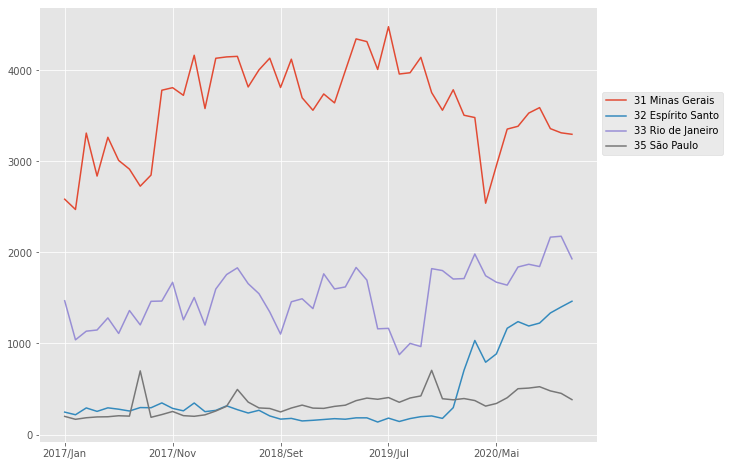

In [102]:
internacoes_privadas[meses_utilizados].loc[estados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))

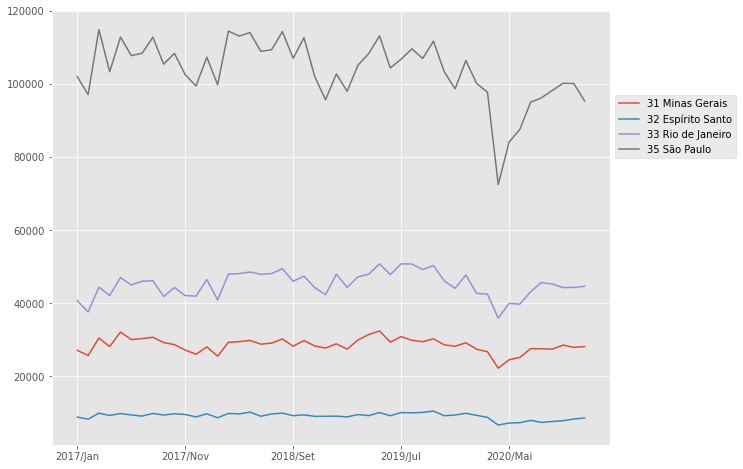

In [104]:
internacoes_publicas[meses_utilizados].loc[estados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))

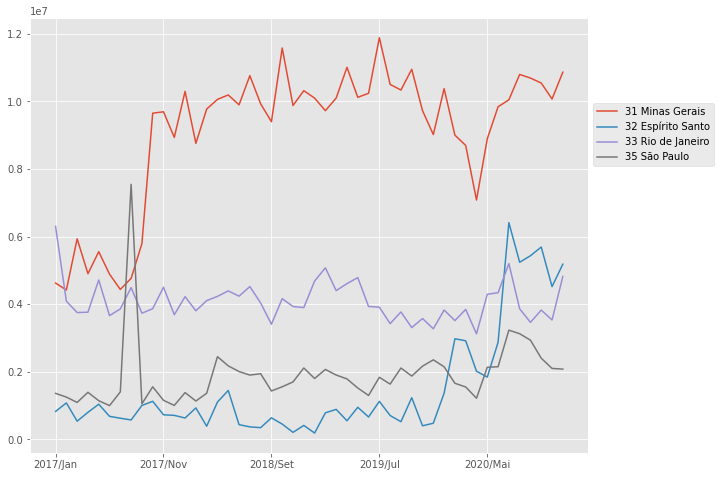

In [105]:
valor_privado[meses_utilizados].loc[estados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))

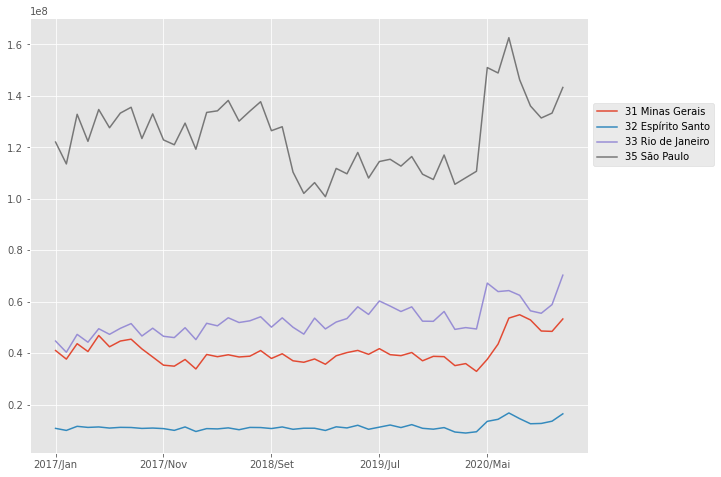

In [106]:
valor_publico[meses_utilizados].loc[estados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))